1. data collection, 2. EDA , 3. Data preprocessing , 4. Train Test Split , 5. ML model

6.Hyperparameter tuning , 7. Model selection , 8. Best trained model, 9.prediction

**Importing the Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, cross_val_score,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
import pickle

#**1.Data Collection**

In [ ]:
# loading the dataset into pandas dataframe
autism_data = pd.read_csv('/content/autism_dataset.csv')

In [ ]:
autism_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
# display all columns of the dataframe
pd.set_option('display.max_columns',None)

In [ ]:
autism_data.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


In [ ]:
autism_data['age']

,age
0,38.172746
1,47.750517
2,7.380373
3,23.561927
4,43.205790
...,...
795,16.597187
796,20.703001
797,5.711481
798,16.414305


In [ ]:
# shape of the dataset
autism_data.shape

(800, 22)

In [ ]:
# checking forthe missing values
autism_data.isnull().sum()

,0
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
# distribution in target column
autism_data['Class/ASD'].value_counts()

,count
Class/ASD,
0,639
1,161


In [ ]:
# information about the data
autism_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
# mathematical statics
autism_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
# printing unique values of some columns
for col in autism_data.columns:
  numerical_features = ['ID','age','result']
  if col not in numerical_features:
    print(col,autism_data[col].unique())
    print("-"*70)

A1_Score [1 0]
----------------------------------------------------------------------
A2_Score [0 1]
----------------------------------------------------------------------
A3_Score [1 0]
----------------------------------------------------------------------
A4_Score [0 1]
----------------------------------------------------------------------
A5_Score [1 0]
----------------------------------------------------------------------
A6_Score [0 1]
----------------------------------------------------------------------
A7_Score [1 0]
----------------------------------------------------------------------
A8_Score [0 1]
----------------------------------------------------------------------
A9_Score [1 0]
----------------------------------------------------------------------
A10_Score [1 0]
----------------------------------------------------------------------
gender ['f' 'm']
----------------------------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' '

In [ ]:
# converting age column from float to integer
autism_data['age'] = autism_data['age'].astype(int)

In [ ]:
autism_data['age']

,age
0,38
1,47
2,7
3,23
4,43
...,...
795,16
796,20
797,5
798,16


In [ ]:
# dropping the ID & age_desc column
autism_data = autism_data.drop(columns = ['ID','age_desc'])

In [ ]:
autism_data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
autism_data.shape

(800, 20)

In [ ]:
# define the mapping dictionary for the country name
mapping = {
    "Viet Nam" : "Vietnam",
    "AmericanSamoa" :"United States",
     "Hong Kong" : "China"
}

# replace value in the country column
autism_data['contry_of_res'] = autism_data['contry_of_res'].replace(mapping)

In [ ]:
autism_data['contry_of_res'].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

**Insights :**
1. Missing values in ethnicity & relation
2. age_desc column has only 1 unique value, so it remove as it is not imp
3. Fix the country name
3. Identify the class imbalance in the target column

#**2. Exploratory Data Analysis(EDA)**

In [ ]:
autism_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,27.963750,8.537303,0.201250
std,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.329827,4.807676,0.401185
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-6.137748,0.000000
25%,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,5.306575,0.000000
50%,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.000000,9.605299,0.000000
75%,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.250000,12.514484,0.000000
max,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.000000,15.853126,1.000000


**Univariate Analysis**

Numerical columns
- age
- result

In [ ]:
# set the desired theme
sns.set_theme(style = 'darkgrid')

Mean : 27.96375
Median : 24.0


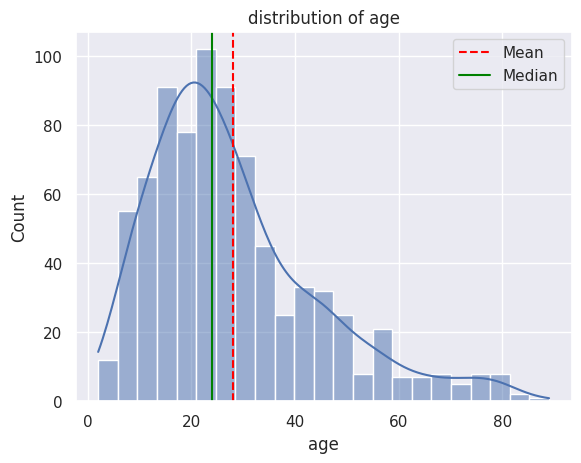

In [ ]:
# histogram for "age"
sns.histplot(autism_data['age'], kde=True)
plt.title("distribution of age")

# calculte mean and median
age_mean = autism_data['age'].mean()
age_median = autism_data['age'].median()

print("Mean :", age_mean)
print("Median :", age_median)

# add vertical lines for mean and median
plt.axvline(age_mean,color='red',linestyle = '--',label='Mean')
plt.axvline(age_median,color='green',linestyle ='-',label='Median')
plt.legend()

plt.show()

Mean 8.537303106501248
Median 9.605299308


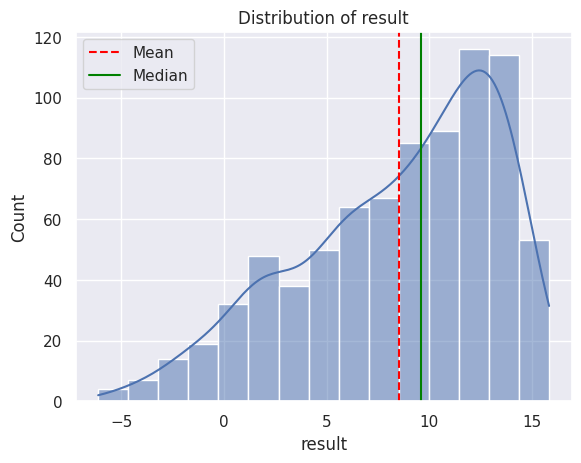

In [ ]:
# histogram for "result"
sns.histplot(autism_data['result'],kde=True)
plt.title("Distribution of result")

# calculating mean and median
result_mean = autism_data['result'].mean()
result_median = autism_data['result'].median()

print("Mean",result_mean)
print("Median",result_median)

# vertical lines for mean and median
plt.axvline(result_mean,color='red',linestyle='--',label = 'Mean')
plt.axvline(result_median,color='green',linestyle='-',label = 'Median')
plt.legend()

plt.show()

**Box plot for identifying outliers in the numerical columns**

***Outliers Analysis***

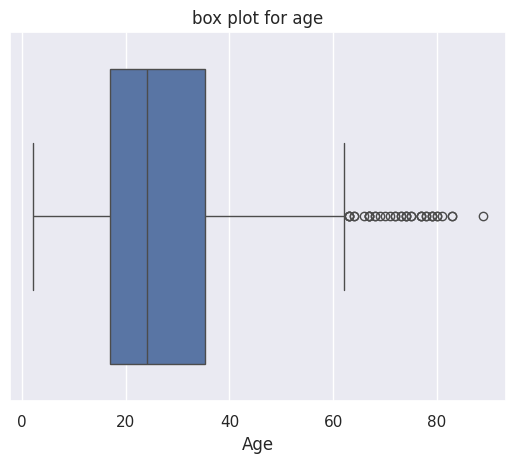

In [ ]:
# box plot
sns.boxplot(x = autism_data['age'])
plt.title("box plot for age")
plt.xlabel("Age")
plt.show()

1.5 times of interqatile range , value above then this range called as outliers

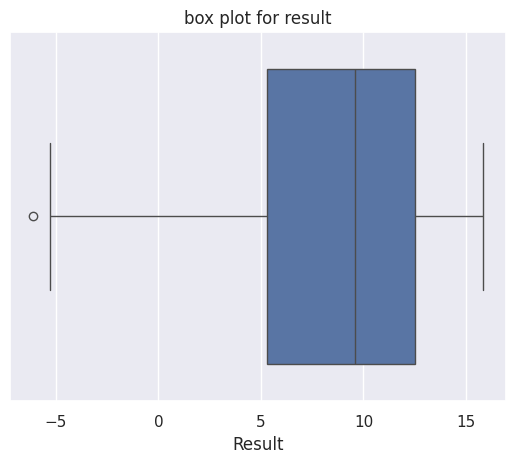

In [ ]:
# boxplot for result
sns.boxplot(x = autism_data['result'])
plt.title("box plot for result")
plt.xlabel("Result")
plt.show()

In [ ]:
# count the outliers using IQR method
Q1 = autism_data['age'].quantile(0.25)
Q3 = autism_data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1-1.5*IQR
upper_bound = Q3 + 1.5*IQR

age_outliers = autism_data[(autism_data['age'] < lower_bound) | (autism_data['age'] > upper_bound)]
print("number of outliers in age",len(age_outliers))

number of outliers in age 39


In [ ]:
# calculating the outliers in result column using IQR method
Q1 = autism_data['result'].quantile(0.25)
Q3 = autism_data['result'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

result_outliers = autism_data[(autism_data['result'] < lower_bound) | (autism_data['result'] > upper_bound)]
print("number of outliers in result",len(result_outliers))

number of outliers in result 1


**Univariate analysis of Categorical columns**

In [ ]:
autism_data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
categorical_col = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
          'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender','ethnicity', 'jaundice',
          'austim', 'contry_of_res', 'used_app_before', 'relation', 'Class/ASD']

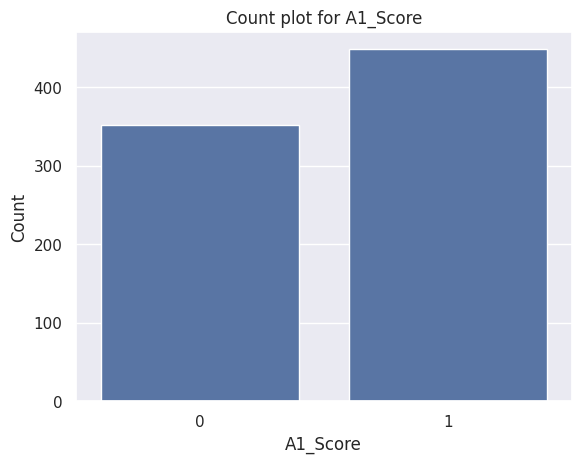

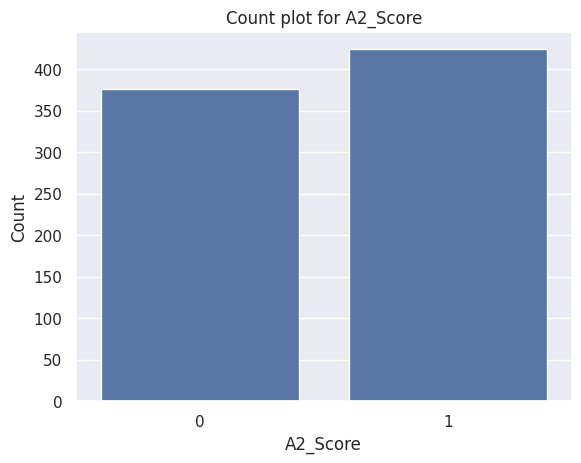

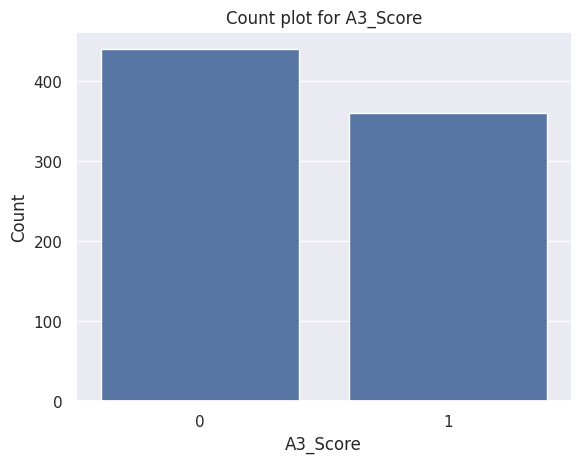

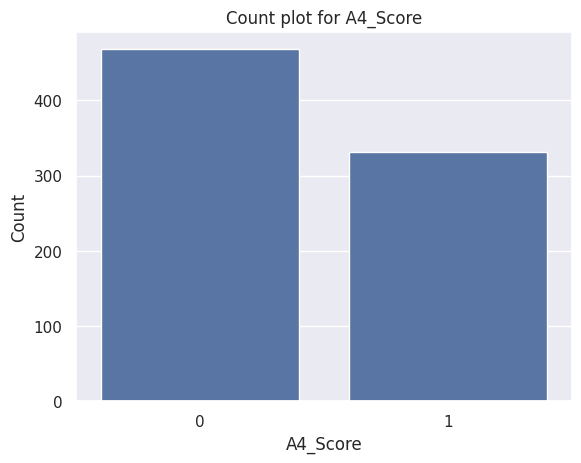

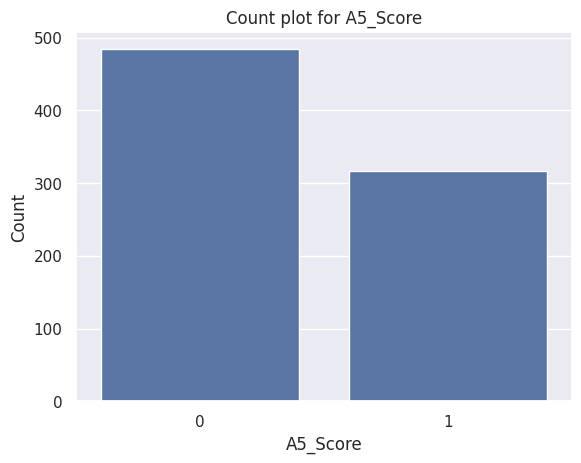

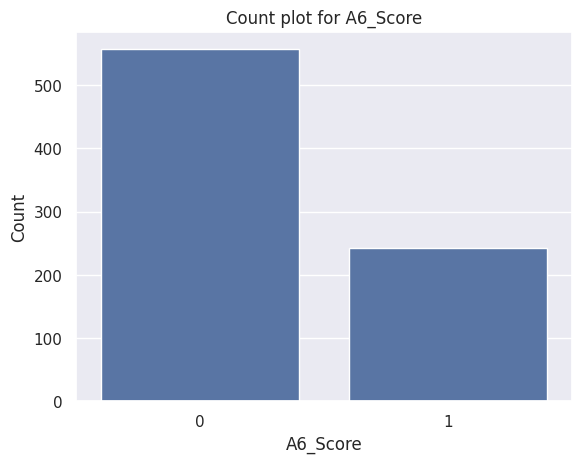

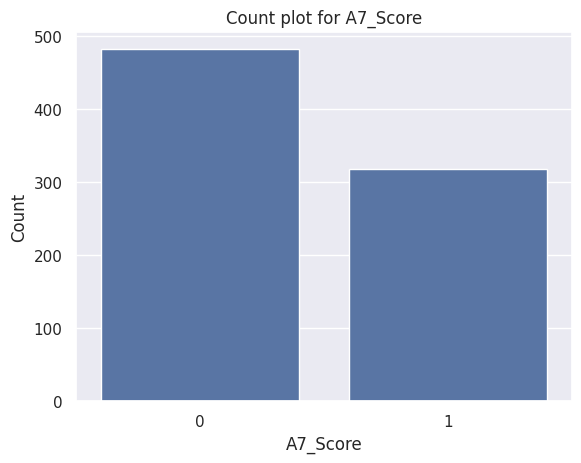

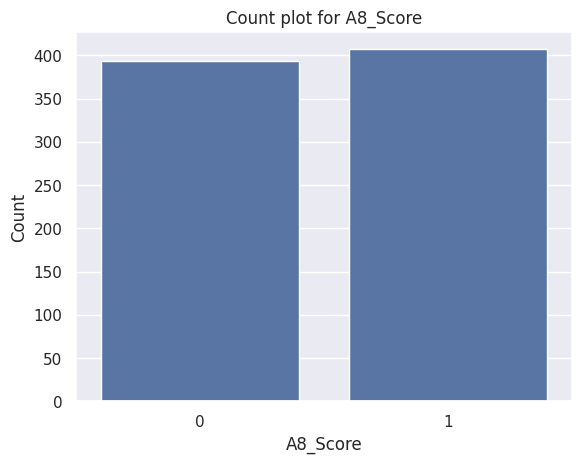

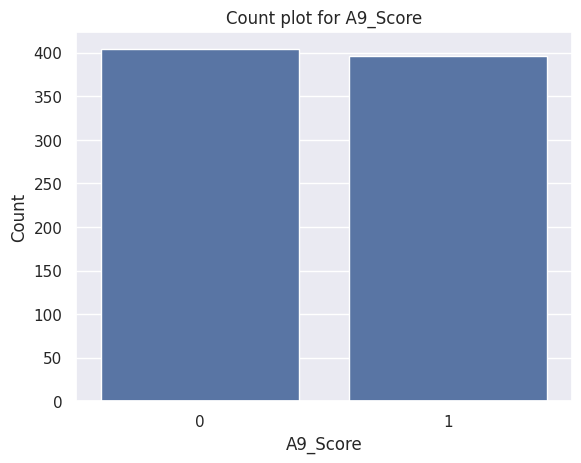

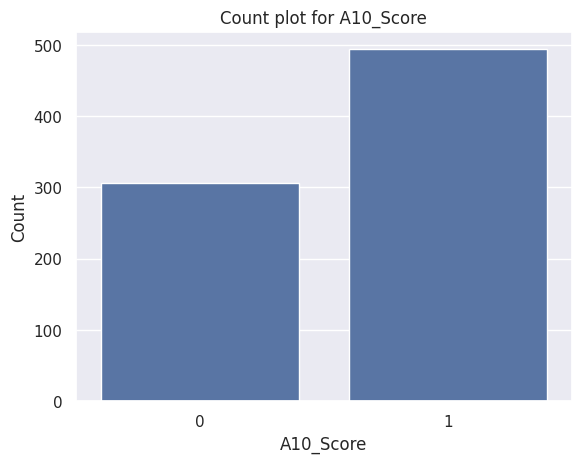

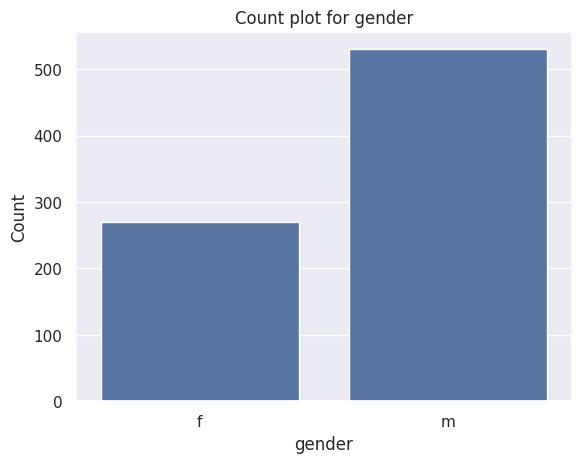

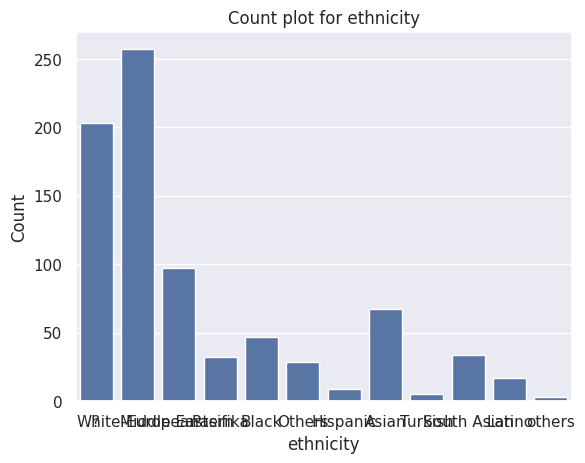

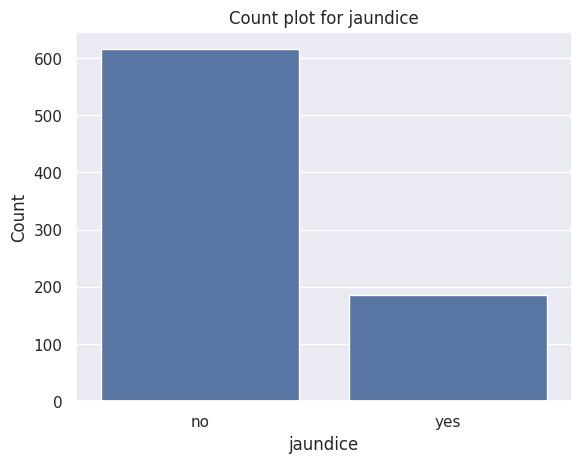

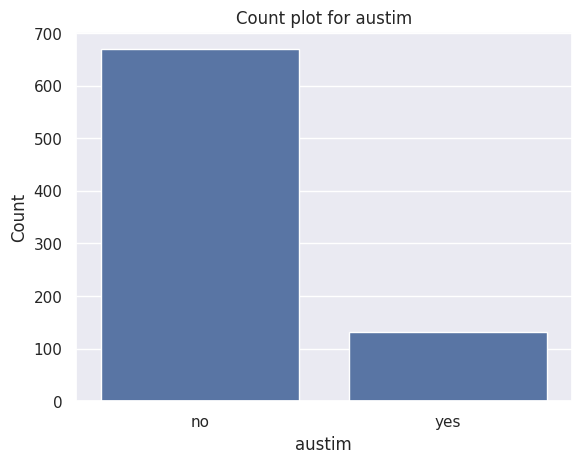

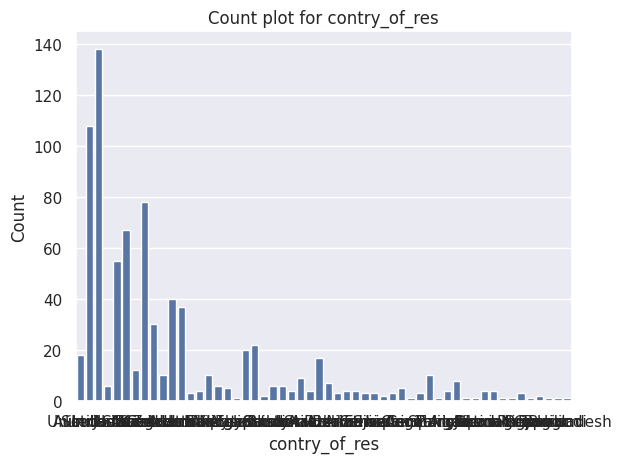

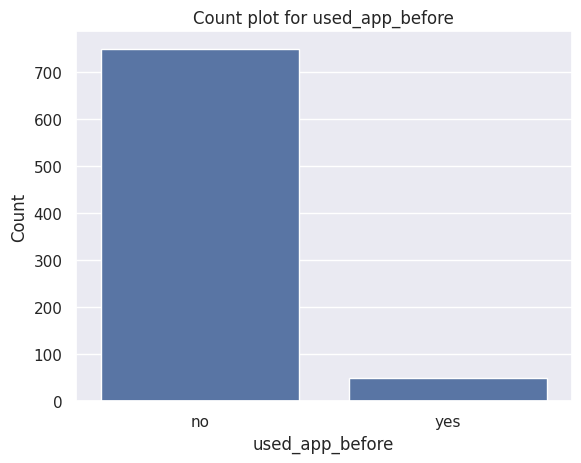

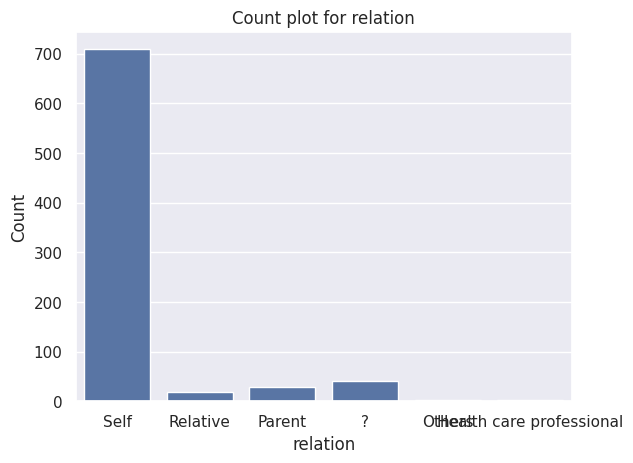

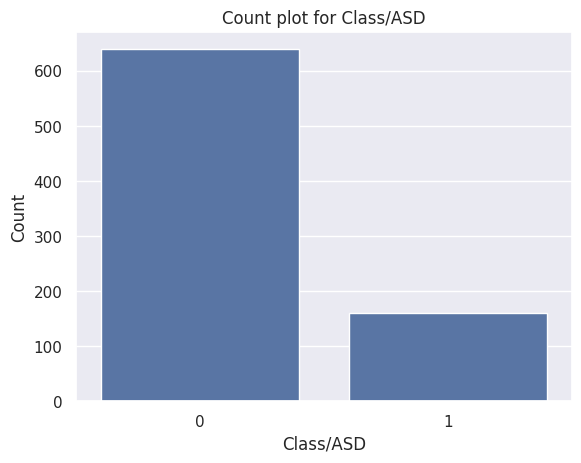

In [ ]:
# count plot for categorical columns
for col in categorical_col:
  sns.countplot(x = autism_data[col])
  plt.title(f"Count plot for {col}")
  plt.xlabel(col)
  plt.ylabel("Count")
  plt.show()

**Handling the missing values (?) in ethnicity and relation column**

In [ ]:
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [ ]:
autism_data['ethnicity'].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [ ]:
autism_data['ethnicity'] = autism_data['ethnicity'].replace({'?' : 'Others', 'others' : 'Others'})

In [ ]:
autism_data['ethnicity'].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [ ]:
autism_data['relation'].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [ ]:
autism_data['relation'] = autism_data['relation'].replace(
                            {'?' : 'Others',
                             'Relative': 'Others',
                             'Parent': 'Others',
                             'Health care professional': 'Others'}

                             )

In [ ]:
autism_data['relation'].unique()

array(['Self', 'Others'], dtype=object)

 **Label Encoding**

In [ ]:
# identifying the columns which contains string values
object_column = autism_data.select_dtypes(include = ['object']).columns

In [ ]:
print(object_column)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [ ]:
# initializing a dictionary to store the encoders
encoders = {}

# applying label encoding and store the encoder
for column in object_column:
  label_encoder = LabelEncoder()
  autism_data[column] = label_encoder.fit_transform(autism_data[column])
  encoders[column] = label_encoder           # saving the encoder for this column

  # save the encoders as pickle file
  with open('label_encoder.pkl','wb') as f:
    pickle.dump(encoders,f)

In [ ]:
autism_data.head(3)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1


In [ ]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

**Bivariate Analysis**

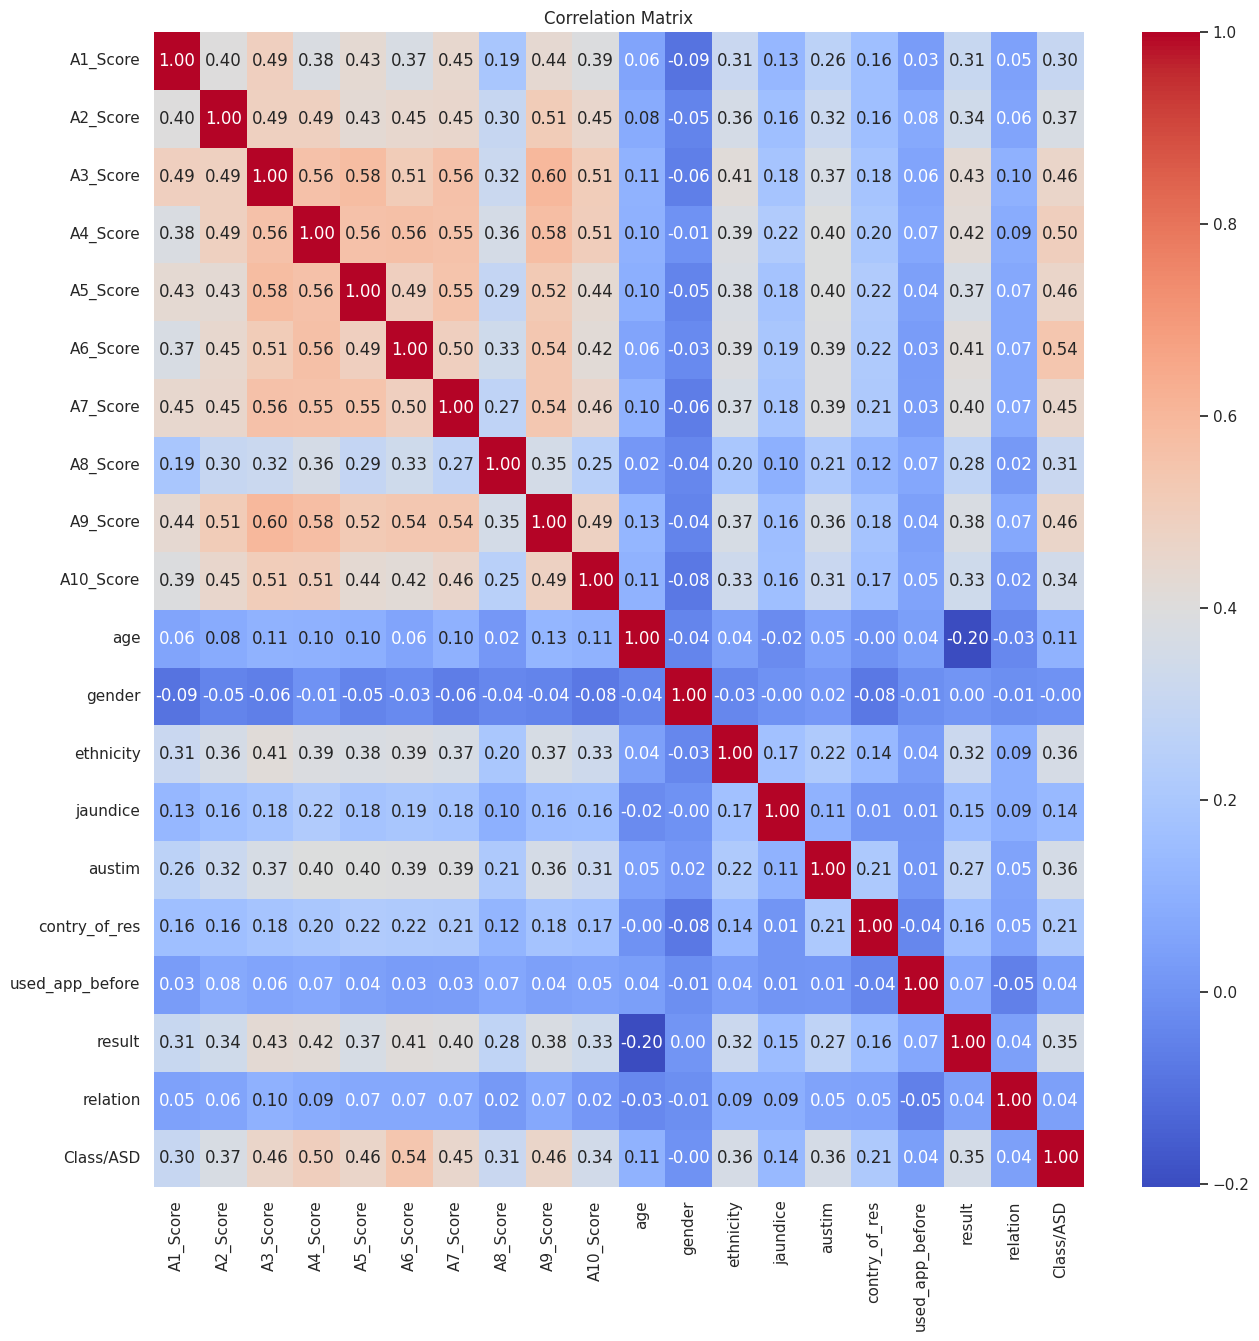

In [ ]:
# correlation matrix
plt.figure(figsize = (15,15))
sns.heatmap(autism_data.corr(),annot = True,cmap = 'coolwarm',fmt = '.2f')
plt.title("Correlation Matrix")
plt.show()

**Insights from EDA**
- There are few outliers in the numerical columns(age,result)
- There is a class imbalance in the target column
- There is a class imbalance in the categorical features
- We don't have any highly correlated column
- Performed label encoding and saved the encoders

#**3. Data Preprocessing**

Handling the outliers

In [ ]:
# function to replace the outliers with median

def replace_outliers_with_median(autism_data,column):
  Q1 = autism_data[column].quantile(0.25)
  Q3 = autism_data[column].quantile(0.75)

  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5*IQR
  upper_bound = Q3 + 1.5*IQR

  median = autism_data[column].median()

  # replace outliers with median value
  autism_data[column] = autism_data[column].apply(lambda x : median if x < lower_bound or x > upper_bound else x)

  return autism_data

In [ ]:
# replace outlier in the "age" column
autism_data = replace_outliers_with_median(autism_data,'age')

# replace outlier in the "result" column
autism_data = replace_outliers_with_median(autism_data,'age')

In [ ]:
autism_data.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


**Train_Test_split**

In [ ]:
# separating features and target
x = autism_data.drop(columns = ['Class/ASD'])
y = autism_data['Class/ASD']

In [ ]:
print(x)

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score  age  gender  ethnicity  jaundice  austi

In [ ]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64


In [ ]:
# train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=4)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(800, 19) (640, 19) (160, 19)


In [ ]:
print(y_train.shape)
print(y_test.shape)

(640,)
(160,)


In [ ]:
y_train.value_counts()

,count
Class/ASD,
0,518
1,122


In [ ]:
y_test.value_counts()

,count
Class/ASD,
0,121
1,39


we can clearly see that there is class imbalance in traininng and test data so we are going to prefor oversampling

**Over- Sampling using SMOTE (Systhetic Minority Oversampling technique)**

In [ ]:
smote = SMOTE(random_state = 42)

x_train_smote,y_train_smote = smote.fit_resample(x_train,y_train)

In [ ]:
print(y_train_smote.shape)

(1036,)


In [ ]:
y_train_smote.value_counts()

,count
Class/ASD,
0,518
1,518


#**Model Training**

In [ ]:
# list of classifier (model)
models = {
    'Decision Tree' : DecisionTreeClassifier(random_state = 42),
    'Random Forest' : RandomForestClassifier(random_state = 42),
     'XGBoost' : XGBClassifier(random_state = 42)
}

In [ ]:
# dictionary to store the cross validation result
cv_score = {}

# performing 5-fold cross validation for each model
for model_names , model in models.items():
  print(f"Training {model_names} with default parameters...")
  scores = cross_val_score(model,x_train_smote,y_train_smote,cv=5,scoring = 'accuracy')
  cv_score[model_names] = scores
  print(f"{model_names} cross-validation accuracy :{np.mean(scores):.2f}")
  print("-"*70)

Training Decision Tree with default parameters...
Decision Tree cross-validation accuracy :0.87
----------------------------------------------------------------------
Training Random Forest with default parameters...
Random Forest cross-validation accuracy :0.92
----------------------------------------------------------------------
Training XGBoost with default parameters...
XGBoost cross-validation accuracy :0.91
----------------------------------------------------------------------


In [ ]:
cv_score

{'Decision Tree': array([0.83653846, 0.89371981, 0.88888889, 0.87922705, 0.8647343 ]),
 'Random Forest': array([0.91346154, 0.9468599 , 0.92270531, 0.90338164, 0.91304348]),
 'XGBoost': array([0.88461538, 0.93236715, 0.93236715, 0.89371981, 0.92753623])}

#**5. Hyperparameter Tuning And Model Selection**

In [ ]:
# initializing the models
decision_tree : DecisionTreeClassifier(random_state = 42)
random_forest : RandomForestClassifier(random_state = 42)
xgboost_classifier : XGBClassifier(random_state = 42)

In [ ]:
# hyperparameter grids for randomizedSearchCV

param_grid_dt = {
    'criterion':['gini','entropy'],
    'max_depth':[None,10,20,30,50,70],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}

param_grid_rf = {
    'n_estimators':[50,100,200,500],
    'max_depth': [None,10,20,30],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'bootstrap':[True,False]
}

param_grid_xgb = {
    'n_estimators':[50,100,200,500],
    'max_depth': [None,10,20,30],
    'learning_rate':[0.01,0.1,0.2,0.3],
    'subsample':[0.5,0.7,1.0],
    'colsample_bytree':[0.5,0.7,1.0]
}

In [ ]:
# Hyperparameter tuning for 3 tree based models

# decision_tree = DecisionTreeClassifier(random_state = 42)
# random_forest = RandomForestClassifier(random_state = 42)
# xgboost_classifier = XGBClassifier(random_state = 42)

# the below steps can be automated by using a for loop or by using pipeline
random_search_dt = RandomizedSearchCV(estimator = decision_tree,param_distributions = param_grid_dt,n_iter = 10,cv=5,scoring='accuracy',random_state=42)
random_search_rf =  RandomizedSearchCV(estimator = random_forest,param_distributions = param_grid_rf,n_iter = 10,cv=5,scoring= 'accuracy',random_state=452) # Corrected param_distribution to param_distributions
random_search_xgb =  RandomizedSearchCV(estimator = xgboost_classifier ,param_distributions = param_grid_rf,n_iter = 10,cv=5,scoring= 'accuracy',random_state=452)

In [ ]:
random_search_dt.fit(x_train_smote,y_train_smote)
random_search_rf.fit(x_train_smote,y_train_smote)
random_search_xgb.fit(x_train_smote,y_train_smote)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:59:30] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "bootstrap", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/pytho

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=452, scoring='accuracy')

In [ ]:
print(random_search_dt.best_estimator_)
print(random_search_dt.best_score_)
print("-"*70)

print(random_search_rf.best_estimator_)
print(random_search_rf.best_score_)
print("-"*70)

print(random_search_xgb.best_estimator_)
print(random_search_xgb.best_score_)
print("-"*70)

DecisionTreeClassifier(max_depth=70, random_state=42)
0.872621701969528
----------------------------------------------------------------------
RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=42)
0.927615198810851
----------------------------------------------------------------------
XGBClassifier(base_score=None, booster=None, bootstrap=False, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, min_samples_leaf=1, min_samples_split=2,
              missing=nan, monotone_constraint

In [ ]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_score = random_search_rf.best_score_
  best_model = random_search_rf.best_estimator_

if random_search_xgb.best_score_ > best_score:
  best_score = random_search_xgb.best_score_
  best_model = random_search_xgb.best_estimator_


print("Best cross_validation Accuracy ",best_score)
print("Best model ",best_model)

Best cross_validation Accuracy  0.927615198810851
Best model  RandomForestClassifier(bootstrap=False, n_estimators=500, random_state=42)


In [ ]:
# save the best model
with open('best_model.pickle','wb') as f:
  pickle.dump(best_model,f)

In [ ]:
# evaluation on test data
y_test_pred = best_model.predict(x_test)
y_test_pred_acc = accuracy_score(y_test,y_test_pred)
print("accuracy ",y_test_pred_acc)

# confusion matrix
print("confusion matrix")
print(confusion_matrix(y_test,y_test_pred))

# classifiaction report
print("classification_report")
print(classification_report(y_test,y_test_pred))

accuracy  0.80625
confusion matrix [[111  10]
 [ 21  18]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       121
           1       0.64      0.46      0.54        39

    accuracy                           0.81       160
   macro avg       0.74      0.69      0.71       160
weighted avg       0.79      0.81      0.79       160

